Vincent Broda
CS522 Project 3

Task 1

In [ ]:
# obtained data from https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
import pandas as pd
import numpy as np

# Here are the basic functions to load and standardize the data.
def load_data(train, test):
  train_data = pd.read_csv(train, skiprows=0)
  test_data = pd.read_csv(test, skiprows=0)
  return train_data, test_data

# This is the same normalizing funt i've been using
def normalize(Tr, Te):
  """Normalize the training set and use the derived statistics to normalize the test set.
  """
  trMean = np.mean(Tr, axis = 0)
  trStd = np.std(Tr, axis = 0)
  Tr = (Tr - trMean) / trStd
  Te = (Te - trMean) / trStd

  return Tr, Te

In [ ]:
# I Didn't want to delete the print statements, so i Commented them out so the output is a bit cleaner.
train, test = load_data('train.csv', 'test.csv')

# taking the y value from the training set and removing it from the rest of it
# Actually i decided not to do that since i dont want to have to mess with deleting y values independently
# y_train = train.iloc[:, -1]
# train = train.iloc[:, :-1]

# I decided not to normalize the data yet, since it gets weird with non numeric entreis, which i will soon fix
# train, test = normalize(train, test)

# print(train)
# print(test)

We have now read in the data, we need to fix all of the missing fetures and categorical fetures.

# Categorical fetures
For this, I have two ways to deal with this.
- The first was the simple historgram approach, where we bacically just count the frequency of apperance of each label, and then divide it by the total number of entries. To do this, I first put the data through a function that would tell me what columns need to be converted, meaning that their data is not a number. Then I take these columns and put it into another function that counts the number of times a label has appeared in the coulumn, and the replaces the label with that number. Since at this point, I have not standardized my data yet, I will not do the dividing by the number of entries part since that will get taken care of later.
- Another approach, that is also simple, would be to simply assign each lable their own unique number. This is similar to the other approach, however the numbers that each value get in this case have even less corilation, as these will either be selected randomly or by the order in which they first appear. Since we are supposed to impliment two ways to deal with categorical fetures, I implimented this to, but since I think the first one will work better I will only use it.

# Missing data
For this, again I have done two methods to make sure that the data will be converted, both of which we coverd in class this time I belive.
- The first is to drop entire columns of data from the table if too many entreies are missing data. In this case, we are using a 60% threshold, as if we are missing any more data than this, we probaby just shouldn't use it. To do this I used a function that counted how many null, or Nan, values that where in each column, and then return a list of the collumns that have to many missing entreis. This list is then given to another function that then removes the column form the data set.
- The next is to estimate what the missing value could be. This is done by breaking up the dataset into parts, these parts or sections can be determined from the y value, in this case it would be the price of the house. We can then calculate the average of the value for every section that we have split the data set into. We then will fill in the missing data with this newly computed average value that we obtained from the section that it is in. It is worth noting that the smaller the sections are, the more accurate and useful the prediction should be, but if we go to small, we might not be able to actually calculate a good value to use. In class, we talked about dividing the data into low, medium, and high parts, but I also thought about doing this based on standard deviations from the data. In the end, and after messing around with it for longer than I should have, the final function now allows the number of slices that the data will be cut into to vary at will.

To fix the data, I will
1. Remove any columns that are above the empty threashold
2. Adjust the categorical data to be numeric
3. Estimate the remaining missing values
4. Standardize it


I am doing it in this order because I think it will lead to the most complete data, first by removing rows so we dont do any unessisary calculations. Then by adjusting all categorical values to be numbers, we will be able to make sure that we will be able to estimate our remaining missing values, as well as standardize all of the data,

In [ ]:
# This is part one of removing columns with to much missing data, gets columns to return
def columns_to_remove(data, threshold=0.6):
  columns = data.columns
  rows = data.shape[0]
  filtered_data = data.copy()
  threashold_amount = rows * threshold

  names = []
  indexes = []
  amounts = []

  # goes through columns and then counts how many null values their are, if their are enough the info is added and then returned
  for i, col in enumerate(columns):
    null_count = data[col].isnull().sum()
    if null_count > threashold_amount:
      names.append(col)
      indexes.append(i)
      amounts.append(null_count)

  print("Columns to remove:")
  print("Names:", names)
  print("Column indexes:", indexes)
  print("NaN totals:", amounts)
  return names, indexes, amounts

# This is part two where we actually remove the data
def remove_columns(data, c_to_remove):
  new_d = data.drop(data.columns[c_to_remove], axis=1)
  print("Columns removed:", c_to_remove)
  return new_d


In [ ]:
# These are the columns that we want to remove, not that if we do this with the testing set we get the same columns to remove
_, rm, _ = columns_to_remove(train)
print(rm)

Columns to remove:
Names: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Column indexes: [6, 72, 73, 74]
NaN totals: [1369, 1453, 1179, 1406]
[6, 72, 73, 74]


In [ ]:
# Here we are removing the columns,
train = remove_columns(train, rm)
# print(train)
# I also removed them from the training set, since it also had the same columns which met the removal criteria
test = remove_columns(test, rm)
# print(test)

Columns removed: [6, 72, 73, 74]
Columns removed: [6, 72, 73, 74]


In [ ]:
# This is part one of converting categorical data to become numerical
def columns_to_convert(data):
  d = data.iloc[1:]
  columns = d.columns
  names = []
  indexes = []

  for i, col in enumerate(columns):
    # print(col)
    dtype = d[col].dtype
    # print(dtype)
    if dtype == 'object':
      names.append(col)
      indexes.append(i)

  return names, indexes

# This is actually converting the catogories to numbers based on the averages in the feture
def convert__categorical_to_numerical(data, c_to_convert):
  for col in c_to_convert:
    count = data[col].value_counts()
    data[col] = data[col].map(count)

  return data

In [ ]:
# we are doing the same thing as before, this time figuring out what columns have categorical data
cat_columns, cat_indexies = columns_to_convert(train)

print("Columns to convert(These have categorical rankings not numeric):")
print("Names:", cat_columns)
print("Column indexes:", cat_indexies)

# again thes give use the same things to converte
# cat_columns, cat_indexies = columns_to_convert(test)
#
# print("Columns to convert(These have categorical rankings not numeric):")
# print("Names:", cat_columns)
# print("Column indexes:", cat_indexies)

Columns to convert(These have categorical rankings not numeric):
Names: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Column indexes: [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 38, 39, 40, 41, 52, 54, 56, 57, 59, 62, 63, 64, 74, 75]


In [ ]:
# And like before, we are then using what we have found to then adjust the data
train = convert__categorical_to_numerical(train, cat_columns)
# print(train)

test = convert__categorical_to_numerical(test, cat_columns)
# print(test)

#  We can verify if it works by seeing that instead of various labels, we know how numbers, and their is enough variation in them for me to be convinced it worked. To do this we can just compare the before and after results

Now we will replace all remaining nan values

In [ ]:
# This function tells what columns have nans and how many their are
def columns_with_nan(data):
  nan_columns = [col for col in data.columns if data[col].isnull().any()]
  nan_indices = [data.columns.get_loc(col) for col in nan_columns]

  if len(nan_columns) > 0:
    print("Columns with NaN values:")
    for col in nan_columns:
      print(f"Column Name: {col}, NaN Count: {data[col].isnull().sum()}")
  else:
    print("No columns with NaN values found.")

  return nan_columns, nan_indices

# This function replaces nans with the averages of whatever section they are in. Sections are called quartiles because for a while i was dividing it into quartiles before i found qcut
def replace_nans_with_averages(data, columns, column_nums, num_slices=8):
  # Use pd.qcut to divide the data into quartiles, this was the game changer
  data['Quartile'] = pd.qcut(data['SalePrice'], num_slices, labels=False)

  for col, col_num in zip(columns, column_nums):
    print(f"Working on column: {col}")
    # Calculate the average for each quartile
    quartile_averages = data.groupby('Quartile')[col].mean()
    print("Quartile averages:", quartile_averages)
    # Replace NaN values in the original DataFrame with the corresponding quartile average
    for idx, row in data.iterrows():
      if pd.isna(row[col]):
        quartile_value = row['Quartile']
        data.at[idx, col] = quartile_averages[quartile_value]
  data.drop(columns='Quartile', inplace=True)
  return data

In [ ]:
# These are the columns with nans still and how many they have
nan_cols_names, nan_cols_num = columns_with_nan(train)
# nan_cols_test_names, nan_cols_test_num = columns_with_nan(test)

Columns with NaN values:
Column Name: LotFrontage, NaN Count: 259
Column Name: MasVnrType, NaN Count: 8
Column Name: MasVnrArea, NaN Count: 8
Column Name: BsmtQual, NaN Count: 37
Column Name: BsmtCond, NaN Count: 37
Column Name: BsmtExposure, NaN Count: 38
Column Name: BsmtFinType1, NaN Count: 37
Column Name: BsmtFinType2, NaN Count: 38
Column Name: Electrical, NaN Count: 1
Column Name: FireplaceQu, NaN Count: 690
Column Name: GarageType, NaN Count: 81
Column Name: GarageYrBlt, NaN Count: 81
Column Name: GarageFinish, NaN Count: 81
Column Name: GarageQual, NaN Count: 81
Column Name: GarageCond, NaN Count: 81


In [ ]:
train = replace_nans_with_averages(train, nan_cols_names, nan_cols_num)
# This cant be done with test, due to its natural dependency on the price of the houses, which the testing set doesnt have
# I think this is ok since we will just use a validation set
#test = replace_nans_with_averages(test, nan_cols_test_names, nan_cols_test_num)

Working on column: LotFrontage
Quartile averages: Quartile
0    58.188235
1    61.981013
2    66.496774
3    68.735714
4    71.970370
5    69.432432
6    81.318519
7    84.656250
Name: LotFrontage, dtype: float64
Working on column: MasVnrType
Quartile averages: Quartile
0    805.819149
1    782.112994
2    729.730159
3    668.314607
4    651.312849
5    624.208791
6    582.440678
7    445.274725
Name: MasVnrType, dtype: float64
Working on column: MasVnrArea
Quartile averages: Quartile
0     25.574468
1     34.451977
2     52.333333
3     88.415730
4    103.050279
5     95.950549
6    136.305085
7    296.598901
Name: MasVnrArea, dtype: float64
Working on column: BsmtQual
Quartile averages: Quartile
0    581.539877
1    613.198830
2    625.870270
3    616.297753
4    610.905028
5    596.405405
6    586.234637
7    378.322404
Name: BsmtQual, dtype: float64
Working on column: BsmtCond
Quartile averages: Quartile
0    1147.368098
1    1207.818713
2    1236.372973
3    1219.550562
4    1241.

In [ ]:
# Yey it worked. non nan values are found and also checked it through print statements to
columns_with_nan(train)

No columns with NaN values found.


([], [])

In [ ]:
# Spliting the price, aka y, from the rest of the set. Price isnt a part of testing set
ytrain = train.iloc[:, -1]
train = train.iloc[:, :-1]

xtrain, xtest = normalize(train, test)

# print(xtrain)
# print(xtest)


In [ ]:
y = ytrain

Error Percentage: 80.34%


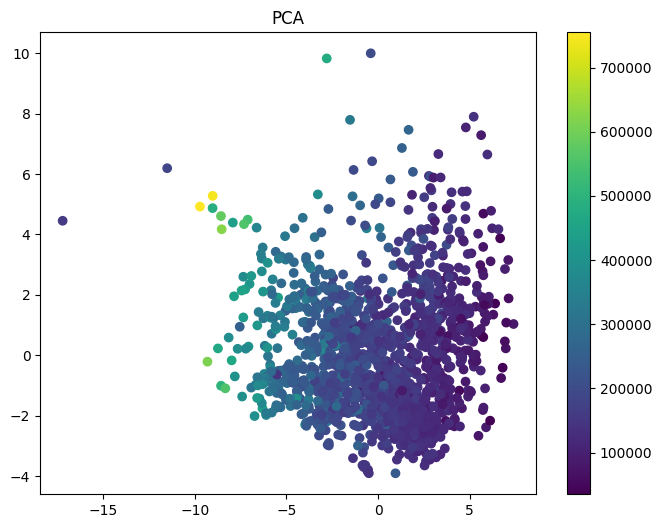

In [ ]:
import matplotlib.pyplot as plt

# This is the pca function that I made for the previous project, It tooks similar enough to sklearn's pca for me to want to use it, the onlt big difference is the plots are kinda fliped
def pca(X, n_components):
    mean = np.mean(X, axis=0)
    centered = X - mean
    covariance_matrix = np.cov(centered, rowvar=False)

    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    selected_eig_vectors = eig_vectors[:, :n_components]

    pX = np.dot(centered, selected_eig_vectors)

    total_variance = np.sum(eig_values)
    retained_variance = np.sum(eig_values[:n_components])

    error_percentage = 1 - (retained_variance / total_variance)

    return pX, error_percentage

pX, pX_error =pca(xtrain, 2)

print(f"Error Percentage: {pX_error * 100:.2f}%")

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pX[:, 0], pX[:, 1], c=y, cmap='viridis')
plt.title("PCA")
plt.colorbar(scatter)
plt.show()

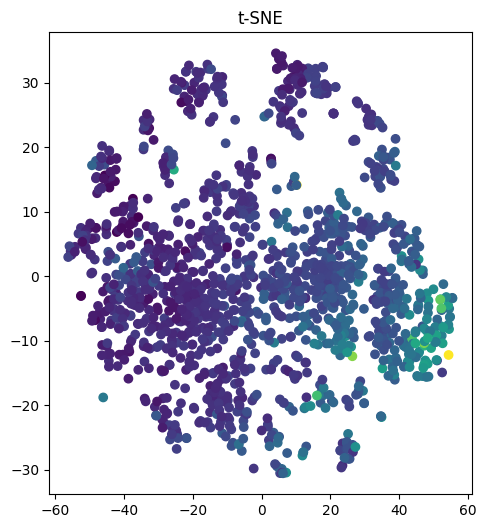

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# doing again with tsne
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(xtrain)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')

plt.show()


To get the best visual effect for this, I spent some time playing around with some of those data replacement and catogorization functions that I made earlier. Specifically, the last one which helps fill in missing data. For this I would change how big the sections that I used to calculate the averages where. Idealy, I think I would try to do either an enumeration though a set amount and have them all on screen to try to pick the best one.
*After doing the last section, I would als try to mess with outlier data to help clean up the plots as well. In tsne you can also see groups of clusters, but there is still clearly some ambiguidy here. Also I think the tsne graph will change whenever we run the cell, but I could argure that I can see around 8 general clusters from tsne.

If I where to change this into a classification problem, I would most likely try to play around wiht price values of the house, and set up thresholds for tiers of houses. I would do this kinda similarly to how I ended up setting up my replace_nans_with_averages functions to come up with classifications.
The sudo code would probably look like:
- sort data by price
- split data into sections
- give each section a tier
- replace price with unique section tier

I could see things being used with the pca reduction especially.

Alternatively, since we have done the classifications allready for t-sne, I could see up doing classification with a clustering of somekind. Idealy, we could use something like kmeans to help us group data points together, and then classify them into tiers that way. I'm not sure how good this part of the idea is, but perhaps we could also get the range of the classification using like the average of the cluster's price.
The sudo code for this woud be something like:
- do t-sne reduction
- do kmeans clustering
- calculate average price of cluster
- Use ranking of average price of cluster to sort out which clusters tend to have higher value homes and which have lower value

Task 2


In [ ]:
from sklearn.model_selection import train_test_split

# Ordering data that will be used for each regression type
pX, pX_error =pca(xtrain, 1)
print("Error:", pX_error * 100)
tsne = TSNE(n_components=1)
tsneX = tsne.fit_transform(xtrain)

# I think we where told about this much to be alocated for valid set in class
#X_train, X_valid, y_train, y_valid = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42) Dont need this one
pX_train, pX_valid, py_train, py_valid = train_test_split(pX, ytrain, test_size=0.3, random_state=42)
tsneX_train, tsneX_valid, tsney_train, tsney_valid = train_test_split(tsneX, ytrain, test_size=0.3, random_state=42)

Error: 86.01044382537859


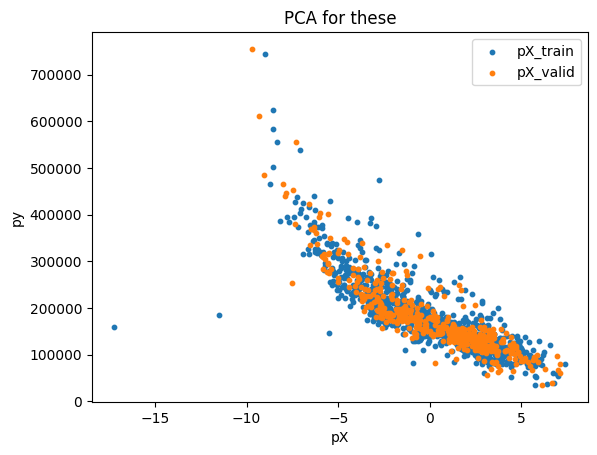

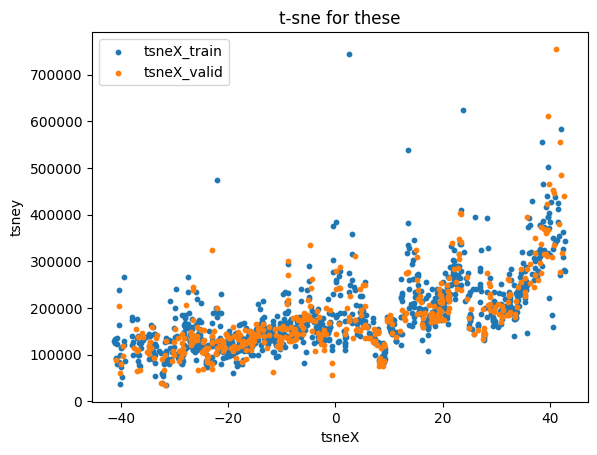

In [ ]:
# Taking a look at what data we will be using
plt.scatter(pX_train, py_train, s=10, label='pX_train')
plt.scatter(pX_valid, py_valid, s=10, label='pX_valid')
plt.xlabel('pX')
plt.ylabel('py')
plt.title("PCA for these")
plt.legend()
plt.show()

plt.scatter(tsneX_train, tsney_train, s=10, label='tsneX_train')
plt.scatter(tsneX_valid, tsney_valid, s=10, label='tsneX_valid')
plt.xlabel('tsneX')
plt.ylabel('tsney')
plt.title("t-sne for these")

plt.legend()

plt.show()


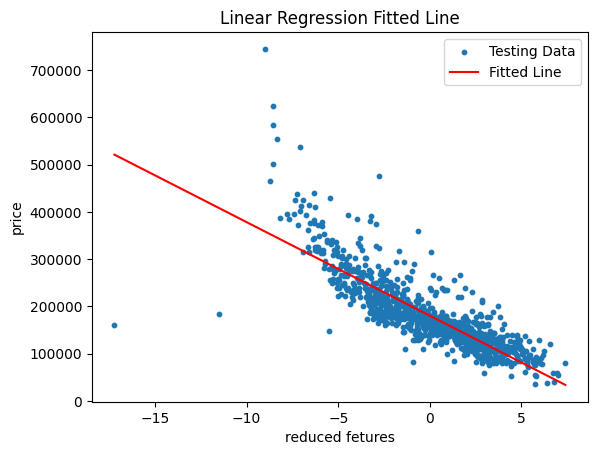

Means Square Error: 36164336505.7451


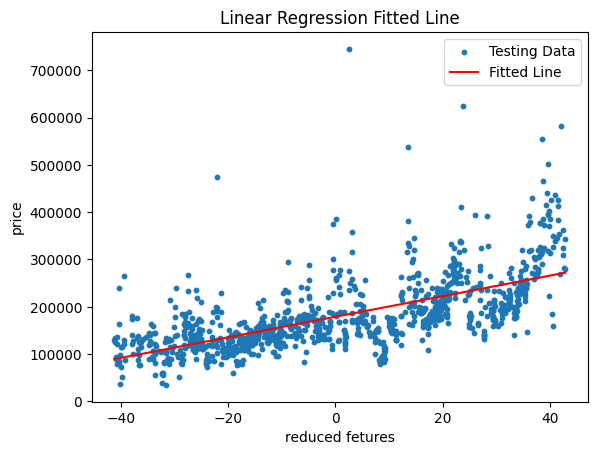

Means Square Error: 11577218146.036789


In [ ]:
def multiple_linear_regression(X, y):
    X = np.column_stack((np.ones(X.shape[0]), X))
    # using the normal equation and matrix multiplication. I think doing it like this help with performance
    coefficients = np.linalg.inv(X.T @ X) @ (X.T @ y)

    return coefficients

def plot_linear_regression(coefficients, X, y, yval):
    x_values = np.linspace(min(X), max(X), 100).reshape(-1, 1)

    X_plot = np.column_stack((np.ones(x_values.shape[0]), x_values))
    # @ does matrix multiplication, this is like doing the linear combination of fetures I think
    y_pred = X_plot @ coefficients

    plt.scatter(X, y, label='Testing Data', s=10)

    plt.plot(x_values, y_pred, label='Fitted Line', color='red')

    plt.xlabel('reduced fetures')
    plt.ylabel('price')
    plt.title('Linear Regression Fitted Line')
    plt.legend()
    plt.show()

    y_reshaped = y[:len(y_pred)]

    # Calculate the mean squared error (MSE)
    mse = np.mean((y_reshaped - y_pred) ** 2)
    print("Means Square Error:", mse)

# Trying both our reduced data
linear_model = multiple_linear_regression(pX_train, py_train)
plot_linear_regression(linear_model, pX_train, py_train, py_valid)

linear_model = multiple_linear_regression(tsneX_train, tsney_train)
plot_linear_regression(linear_model, tsneX_train, tsney_train, tsneX_valid)

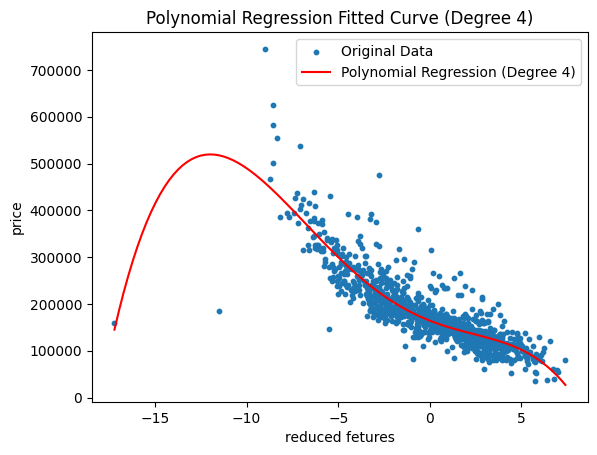

Means Square Error: 41076692161.66681


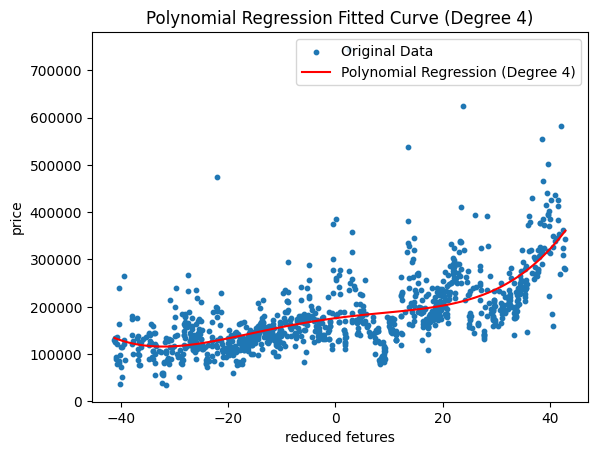

Means Square Error: 11831265973.505442


In [ ]:
# same thing for polynomial now, I think all concepts here are basically the same
def polynomial_regression(X, y, degree=2):
  # Raising degree of input
  X_poly = np.column_stack([X**i for i in range(1, degree + 1)])
  # Adding a column for bias
  X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))
  # Again, this matrix multiplication gives us the coefficients we need for the equation
  coefficients = np.linalg.inv(X_poly.T @ X_poly) @ (X_poly.T @ y)
  return coefficients

# Companion ploting function, again I think this is a slightly beefed up version of what was before
def plot_polynomial_regression(coefficients, X, y, degree=2):
  x_values = np.linspace(min(X), max(X), 100)

  X_poly_plot = np.column_stack([x_values**i for i in range(1, degree + 1)])
  X_poly_plot = np.column_stack((np.ones(X_poly_plot.shape[0]), X_poly_plot))

  y_pred = X_poly_plot @ coefficients

  plt.scatter(X, y, label='Original Data', s=10)
  plt.plot(x_values, y_pred, label=f'Polynomial Regression (Degree {degree})', color='red')
  plt.xlabel('reduced fetures')
  plt.ylabel('price')
  plt.title(f'Polynomial Regression Fitted Curve (Degree {degree})')
  plt.legend()
  plt.show()

  y_reshaped = y[:len(y_pred)]
  # Calculate the mean squared error (MSE)
  mse = np.mean((y_reshaped - y_pred) ** 2)
  print("Means Square Error:", mse)

# We can change degree to whatever we want, I liked 4, lower is to basic and above it to much I think
deg = 4
polynomial_model = polynomial_regression(pX_train, py_train, degree=deg)
plot_polynomial_regression(polynomial_model, pX_train, py_train, degree=deg)

polynomial_model = polynomial_regression(tsneX_train, tsney_train, degree=deg)
plot_polynomial_regression(polynomial_model, tsneX_train, tsney_train, degree=deg)


Logistic

In [ ]:
# Literally sigmoid funtion
def sigmoid(z):
  # This part is done to get rid of some
  z = np.clip(z, -500, 500)
  return 1 / (1 + np.exp(-z)) # z works as b0 and b1

# I tried so many versions of this, including the sklearn logistic regression, and I basically always got the same plot
def logistic_regression(X, y, learning_rate=0.01, num_iterations=10000):
  m, n = X.shape
  X = np.column_stack((np.ones(m), X))
  coefficients = np.zeros(n + 1)
  # trying to find best b0 and b1, or mu and sigma i think, for logistic regression equation. Trying for num_itterations for GD
  for i in range(num_iterations):
    z = X @ coefficients  # Coefficiansts are a 2d array in our case
    predictions = sigmoid(z)
    error = predictions - y
    gradient = X.T @ error / m
    coefficients -= learning_rate * gradient

  return coefficients

# Similar type of ploting function as before
def plot_logistic_regression(coefficients, X, y):
  x_min, x_max = X.min() - 1, X.max() + 1
  x_values = np.linspace(x_min, x_max, 100).reshape(-1, 1)

  X_plot = np.column_stack((np.ones(x_values.shape[0]), x_values))

  probabilities = sigmoid(X_plot @ coefficients)

  plt.scatter(X, y, label='Original Data', s=10)

  plt.plot(x_values, probabilities, label='Decision Boundary', color='red')
  plt.xlabel('reduced fetures')
  plt.ylabel('price')
  plt.title('Logistic Regression')
  plt.legend()
  plt.show()
  y_reshaped = y[:len(probabilities)]

  mse = np.mean((probabilities - y_reshaped) ** 2)
  print(f"MSE: {mse:.4f}")

[ 18131212.91649011 -21882531.05935438]


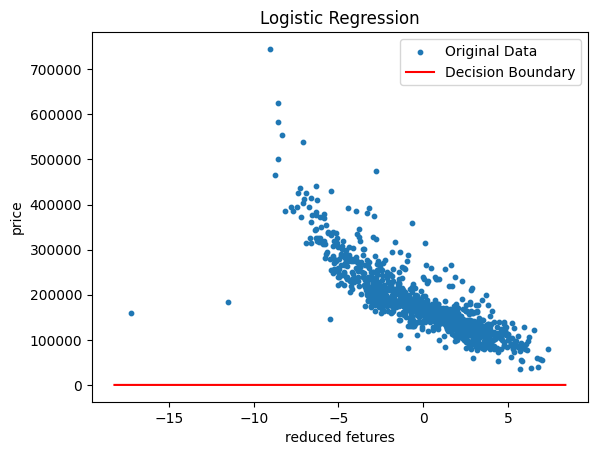

MSE: 42930912196.5100


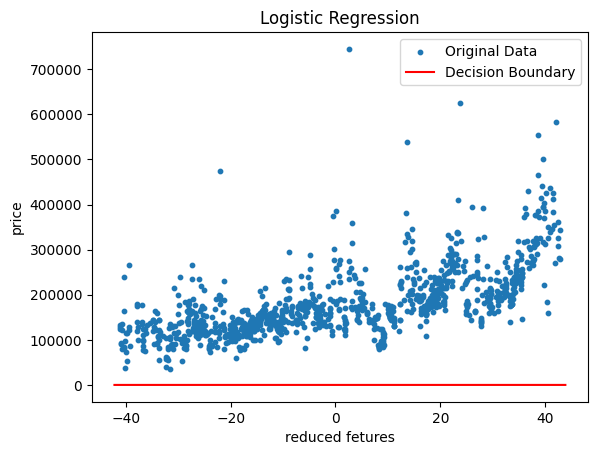

MSE: 42930989861.4100


In [ ]:
coefficients_logistic = logistic_regression(pX_train, py_train)
print(coefficients_logistic)  # This is definity a problem, I had some trouble with this in hw to
plot_logistic_regression(coefficients_logistic, pX_train, py_train)


coefficients_logistic = logistic_regression(tsneX_train, tsney_train)
plot_logistic_regression(coefficients_logistic, tsneX_train, tsney_train)

Task 2 Comparion
I tried to do a MSE calculation to look at the error for the different regressions, however every time I did this the number was insainly high. I belive this is because the reduced fetures numbers tended produce a large overlap in its reduced feture and price, but still it seemed quite large, especially for how the lines/curves fit the plots. I probably should have either standardized my data more, by trying to eliminate more noise, or used a library call. Still, I think we can see clear patters just from the plots. I think that the polynomial regression seemed like it was the best. This is because we can adjust whatever degree we want the equation to be, but my MSE calculation would still disagree with this. All this being said, I did not have much luck with linear regression at all. I tried using the sklearn call as well, but that always gave me similar results. I do think that if we reduced the dimensionity to a slightly higher demension, or again try to remove more noise from the data, we would see some better results, and I would expect to clearly see polynomial regression and tnse start to really produce better results. I say this because I would expect to see more varied results with tsne and a better and more customizable fit with polynomial.

Task 3

Ridge MSE: 1804140328.7509944
Lasso MSE: 1804056366.48605
ElasticNet MSE: 1855824115.4620178
Decision Tree MSE: 2255911632.4383564
SVR MSE: 7181801437.386558


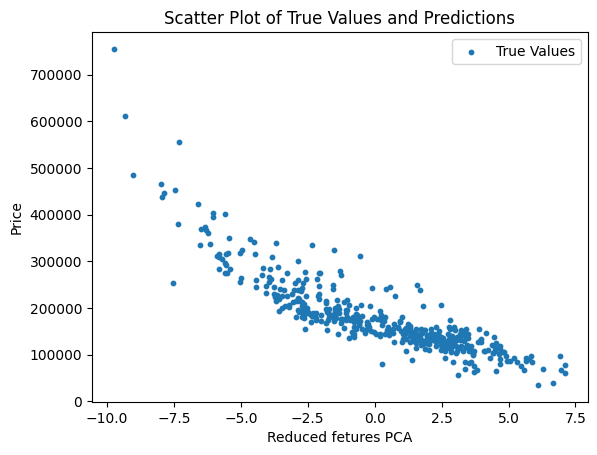

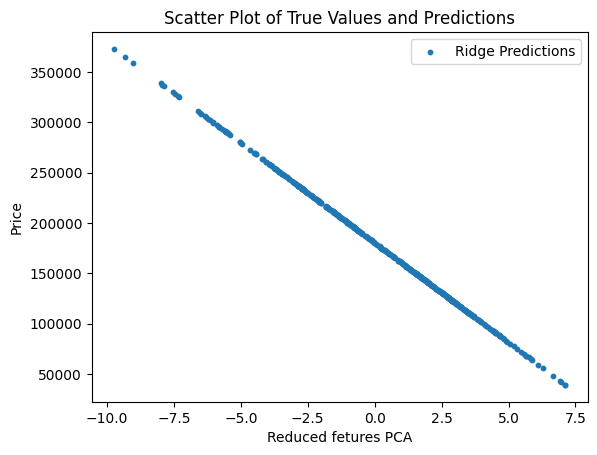

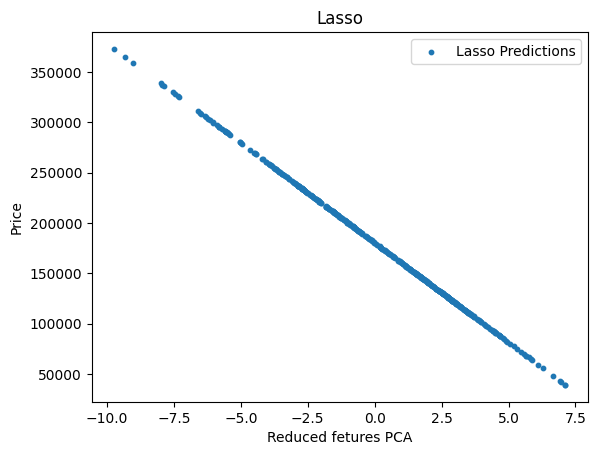

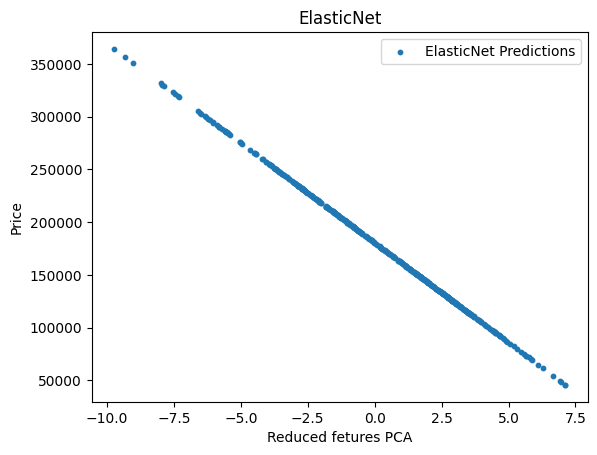

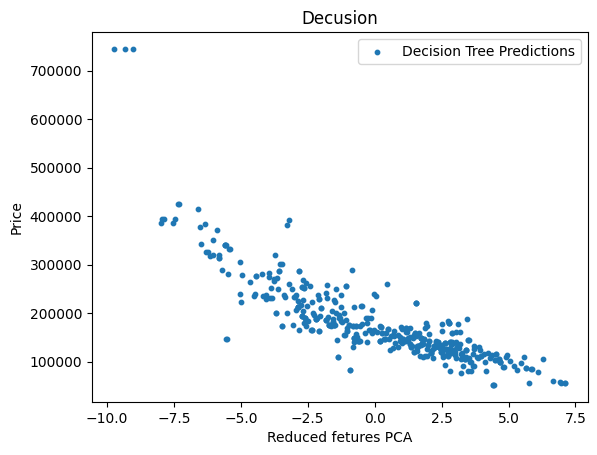

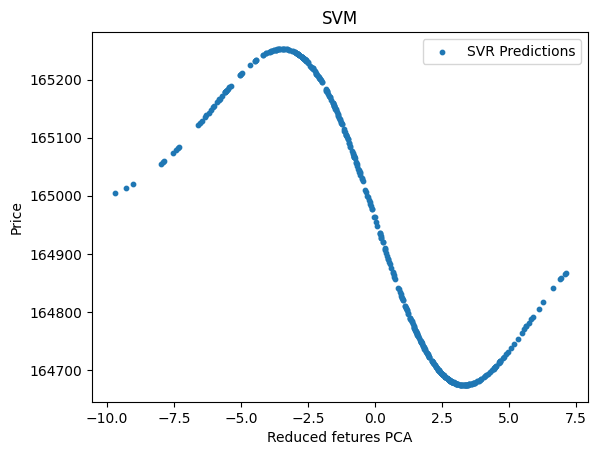

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(pX_train, py_train)
ridge_predictions = ridge_model.predict(pX_valid)
ridge_mse = mean_squared_error(py_valid, ridge_predictions)
print("Ridge MSE:", ridge_mse)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(pX_train, py_train)
lasso_predictions = lasso_model.predict(pX_valid)
lasso_mse = mean_squared_error(py_valid, lasso_predictions)
print("Lasso MSE:", lasso_mse)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(pX_train, py_train)
elasticnet_predictions = elasticnet_model.predict(pX_valid)
elasticnet_mse = mean_squared_error(py_valid, elasticnet_predictions)
print("ElasticNet MSE:", elasticnet_mse)

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(pX_train, py_train)
dt_predictions = dt_model.predict(pX_valid)
dt_mse = mean_squared_error(py_valid, dt_predictions)
print("Decision Tree MSE:", dt_mse)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(pX_train, py_train)
svr_predictions = svr_model.predict(pX_valid)
svr_mse = mean_squared_error(py_valid, svr_predictions)
print("SVR MSE:", svr_mse)

# For comparion
plt.scatter(pX_valid, py_valid, label='True Values', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot of True Values and Predictions')
plt.show()

plt.scatter(pX_valid, ridge_predictions, label='Ridge Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot of True Values and Predictions')
plt.show()

plt.scatter(pX_valid, lasso_predictions, label='Lasso Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Lasso')
plt.show()

plt.scatter(pX_valid, elasticnet_predictions, label='ElasticNet Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('ElasticNet')
plt.show()

plt.scatter(pX_valid, dt_predictions, label='Decision Tree Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Decusion')
plt.show()

plt.scatter(pX_valid, svr_predictions, label='SVR Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('SVM')
plt.show()

# Tried to get subplot working but maid an error and its late so I'm sticking with this

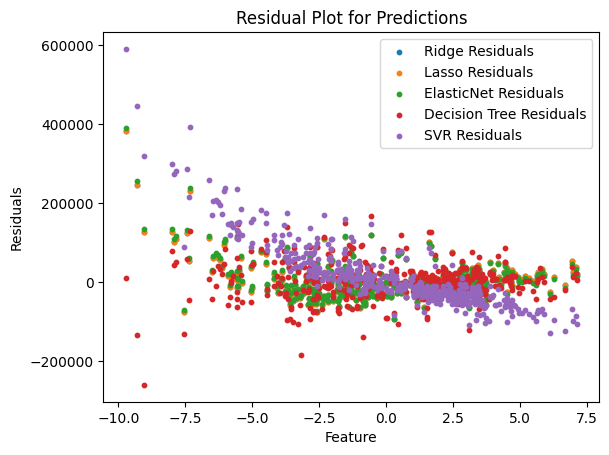

In [ ]:
# Another type of plot that I thought was intresting
plt.scatter(pX_valid, py_valid - ridge_predictions, label='Ridge Residuals', s=10)
plt.scatter(pX_valid, py_valid - lasso_predictions, label='Lasso Residuals', s=10)
plt.scatter(pX_valid, py_valid - elasticnet_predictions, label='ElasticNet Residuals', s=10)
plt.scatter(pX_valid, py_valid - dt_predictions, label='Decision Tree Residuals', s=10)
plt.scatter(pX_valid, py_valid - svr_predictions, label='SVR Residuals', s=10)

plt.xlabel('Feature')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot for Predictions')
plt.show()

Ridge MSE: 3823565413.101656
Lasso MSE: 3823564837.5337815
ElasticNet MSE: 3824244031.378013
Decision Tree MSE: 3437077538.5068493
SVR MSE: 7183443134.0012


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.443e+08, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


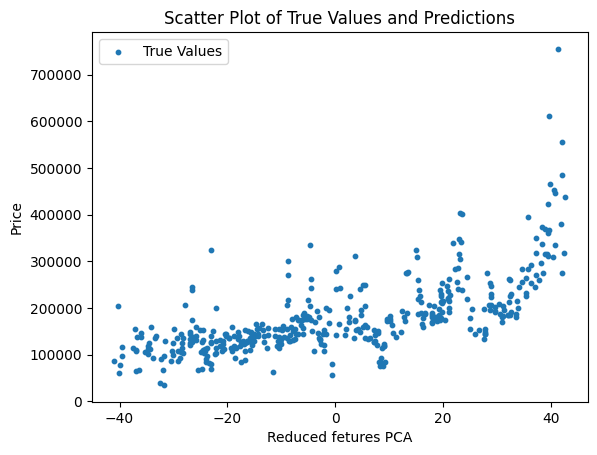

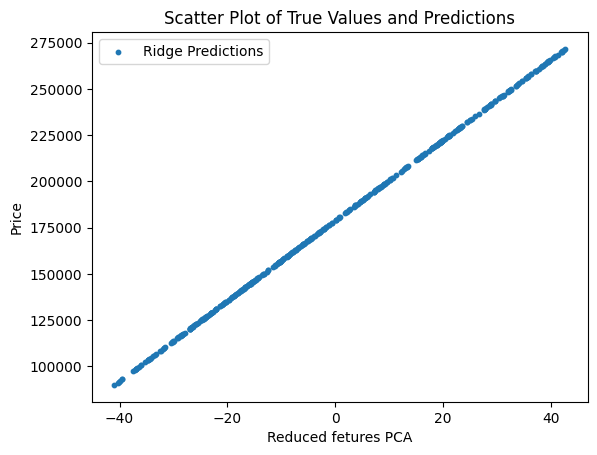

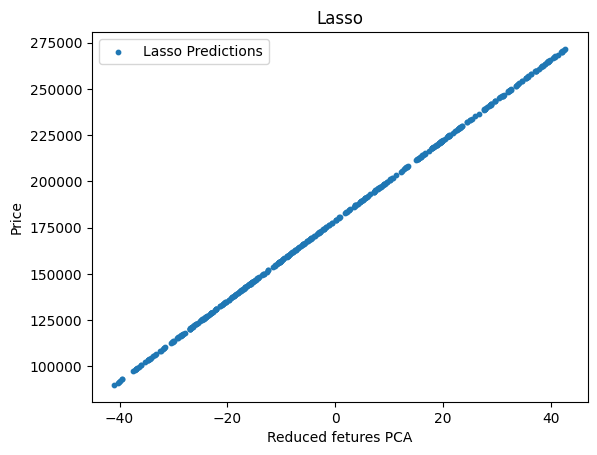

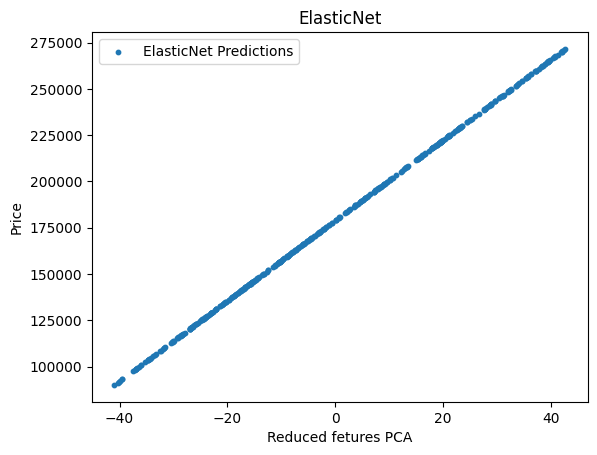

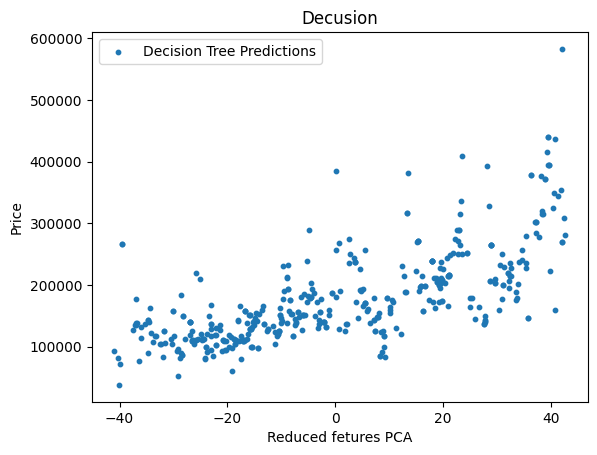

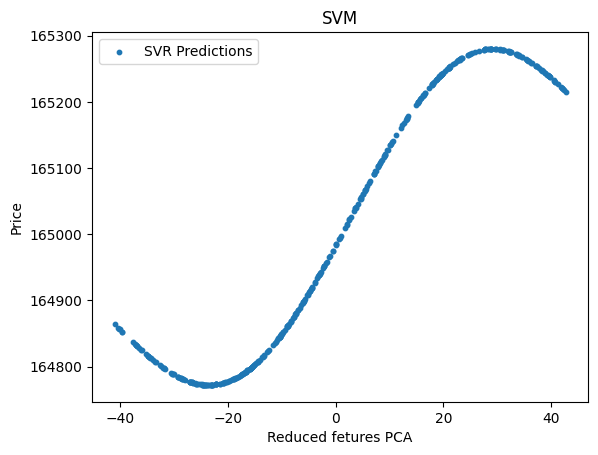

In [ ]:
# same thing but now wjith tsne reduced X
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(tsneX_train, tsney_train)
ridge_predictions = ridge_model.predict(tsneX_valid)
ridge_mse = mean_squared_error(tsney_valid, ridge_predictions)
print("Ridge MSE:", ridge_mse)

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(tsneX_train, tsney_train)
lasso_predictions = lasso_model.predict(tsneX_valid)
lasso_mse = mean_squared_error(tsney_valid, lasso_predictions)
print("Lasso MSE:", lasso_mse)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(tsneX_train, tsney_train)
elasticnet_predictions = elasticnet_model.predict(tsneX_valid)
elasticnet_mse = mean_squared_error(tsney_valid, elasticnet_predictions)
print("ElasticNet MSE:", elasticnet_mse)

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(tsneX_train, tsney_train)
dt_predictions = dt_model.predict(tsneX_valid)
dt_mse = mean_squared_error(tsney_valid, dt_predictions)
print("Decision Tree MSE:", dt_mse)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(tsneX_train, tsney_train)
svr_predictions = svr_model.predict(tsneX_valid)
svr_mse = mean_squared_error(tsney_valid, svr_predictions)
print("SVR MSE:", svr_mse)

# For comparion
plt.scatter(tsneX_valid, tsney_valid, label='True Values', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot of True Values and Predictions')
plt.show()

plt.scatter(tsneX_valid, ridge_predictions, label='Ridge Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plot of True Values and Predictions')
plt.show()

plt.scatter(tsneX_valid, lasso_predictions, label='Lasso Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Lasso')
plt.show()

plt.scatter(tsneX_valid, elasticnet_predictions, label='ElasticNet Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('ElasticNet')
plt.show()

plt.scatter(tsneX_valid, dt_predictions, label='Decision Tree Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('Decusion')
plt.show()

plt.scatter(tsneX_valid, svr_predictions, label='SVR Predictions', s=10)
plt.xlabel('Reduced fetures PCA')
plt.ylabel('Price')
plt.legend()
plt.title('SVM')
plt.show()

# Tried to get subplot working but maid an error and its late so I'm sticking with this

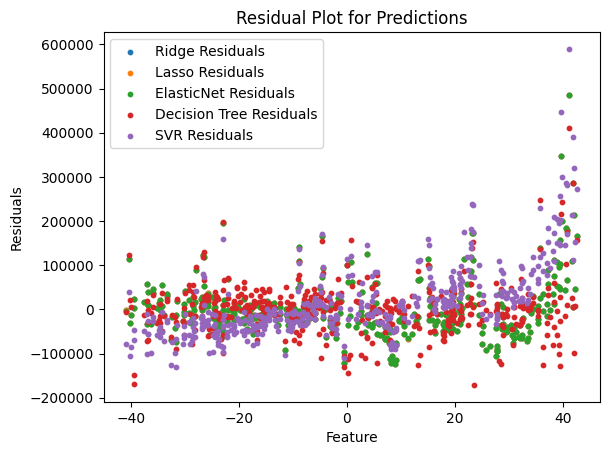

In [ ]:
# Another type of plot that I thought was intresting
plt.scatter(tsneX_valid, tsney_valid - ridge_predictions, label='Ridge Residuals', s=10)
plt.scatter(tsneX_valid, tsney_valid - lasso_predictions, label='Lasso Residuals', s=10)
plt.scatter(tsneX_valid, tsney_valid - elasticnet_predictions, label='ElasticNet Residuals', s=10)
plt.scatter(tsneX_valid, tsney_valid - dt_predictions, label='Decision Tree Residuals', s=10)
plt.scatter(tsneX_valid, tsney_valid - svr_predictions, label='SVR Residuals', s=10)

plt.xlabel('Feature')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot for Predictions')
plt.show()
# I think the linear fits are overlaping

Discusion of sklearn routines:
It was intresting looking at these routines, especially with how they compared to task2 code. For starters, it seems like the newly added linear regresion types have similar slpoes compared to each other, but seem to be differrent from what I had earlier with the linear regresion function. In these cases I belive the lines sre steeper. Decision tree seems like it might be the best because of its general overlay over the data. This being said I think it might also be trying to over correct and might be a bit to affected by outliers. The SVM regression is most similar to the polynomial regression, and it seems like its problem will occur twords the vertexes of the curve. It seems like at these changing points, it has a step change. I am also now noticing that I probably would have benifited from shiffliung the validation set data more.

I would say decision tree worked the best overall, and that now I am more curious on how it works. I think that it did worse on pca due to how close the data points are.

# Task 4
For this, since the leader boards where a bit weird with actually finding people's code who was on it, I used 1 that I found in the top 5 I belive and one that claims to be in the tip 30%. I belive this is ok based on what I read in teams, and I will link to the code before I talk about each.

1. https://www.kaggle.com/code/mawro73/easy-notebook-advanced-regression-top30
- This approach pre processes the data, in doing so their main goal was to find highest corolated fetures from the data set. After they do this, they run a whole bunch of models, some that we have talked about in class and some that we haven't. They then fit and test all of the modles on their list, from this they seem to learn not only the best preforming model, though look at Mean squared error, but also something called the best hyperparameter. They finally bost their model more with some kind of function called CatBoostRegressor.
2. https://www.kaggle.com/code/serkanp/house-prices-advanced-regression-techniques
- This approach also tries to fix the data, however it chose to be even more strict about about the Nan values in the data. They even ofer a suggestion of doing a deaper dive into the catagories and figuring out what Nan's could be defaulted to zero. This person then goes into looking at the distributions of a lot of the data, and I belive their end goal in this is to find any fetures that seem to be strongly associated with the Sale Price. After they get their list of strongly corralated fetures, they remove outliers from these fetures. In the end they found 11 fetures that they said had patterns helping to determin the price
3. https://www.kaggle.com/code/maxwellrrrr/demo-using-fully-connected-nn
- I picked this one because it was more different that the other two I picked. This one, like all of the other, some preprocessing, however this one seems to be the simplest and weekest, however that being said, It does the rest of its approach as a Neural network. We have only just started talking about multi level perceptrons in class, but this approach was still cool to look at. I had a harder time actually telling what some of the code is doing, but I think I was still able to infer a decent amount of it. They seem to set up all of the layers of their network in a class and seems to do 800 epochs of batch processing to train the network. I also though it was cool seeing them use cuda to help with their training.

# How I would improve my own now
Well one thing this has told me is that their are several different way to pre process the data, even more so than we where required to do. I would like to try to incorporate some of these, specifically dealing with outliers and dropping more data that can clearly be seen to not have a converging pattern. This would help make sure that it is possible to fit a line into the data more consistently and hopefuly more accuratly. The only concern with this would be to over fit the data. I would also want to spend more time analyzing the data and looking for any pattern that I could see, and hopefuly use that pattern as a jumping off point to help identify what algorith or model would be good to use based off these properties. Clearly, their are lots of different fits we can try, it can never hurt to try more and experiment with different combinations of regressions, or classifiers depending on the problem, and diffrent pre-proccesing methods.